In [1]:
import kecam
%matplotlib inline

import os
import tensorflow as tf
from pathlib import Path

- Img and model selection :

In [2]:
#mm = kecam.yolor.YOLOR_CSP()
#model = "yolor_csp"
model = "yolov7_tiny"
mm = kecam.yolov7.YOLOV7_Tiny()
imm_orig = kecam.test_images.cat()
img_name = "cat"
#imm_orig = kecam.test_images.dog_cat()
#img_name = "cat_dog"

>>>> Load pretrained from: C:\Users\maxime.carrere\.keras\models\yolov7_tiny_coco.h5


- get model prediction for image :

(512, 512, 3)
(1, 10647, 85)


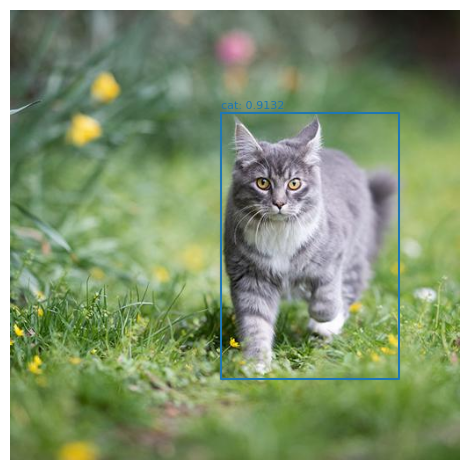

<Axes: >

In [3]:

print(imm_orig.shape)
imm = mm.preprocess_input([imm_orig])
preds = mm(imm)

print(preds.shape)
preds = mm.decode_predictions(preds)
bboxs, lables, confidences = preds[0]
kecam.coco.show_image_with_bboxes(imm_orig, bboxs, lables, confidences)

In [4]:
from xplique_test import Explainer
Explainer.methods

{'ig': xplique.attributions.integrated_gradients.IntegratedGradients,
 'saliency': xplique.attributions.saliency.Saliency,
 'deconvnet': xplique.attributions.deconvnet.DeconvNet,
 'gradient_input': xplique.attributions.gradient_input.GradientInput,
 'guided_backprop': xplique.attributions.guided_backpropagation.GuidedBackprop,
 'sobol': xplique.attributions.global_sensitivity_analysis.sobol_attribution_method.SobolAttributionMethod,
 'smoothgrad': xplique.attributions.smoothgrad.SmoothGrad}

In [5]:
explainer = Explainer(mm)
params = {
    "batch_size":16
}
method = "saliency"
explanation = explainer.apply(method, preds, imm, params)

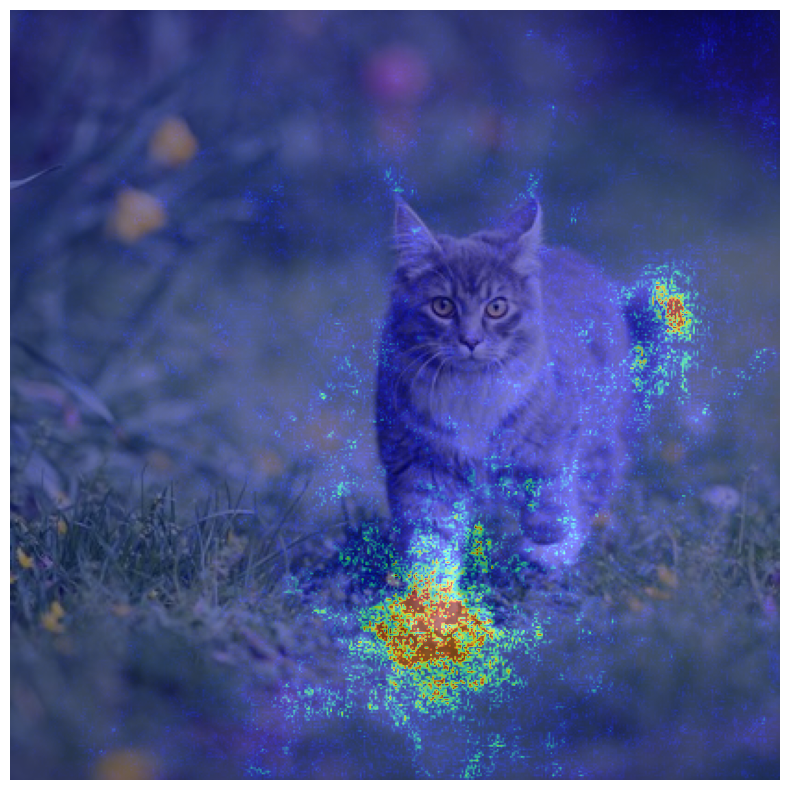

In [6]:
explainer.visualize(exp_name=f"{model}_{img_name}", dest_folder="img")

In [7]:
explainer.metrics

{'deletion': xplique_metrics.fidelity.Deletion,
 'insertion': xplique_metrics.fidelity.Insertion,
 'mufidelity': xplique_metrics.fidelity.MuFidelity,
 'average_stability': xplique_metrics.stability.AverageStability}

In [14]:
#explainer.score("average_stability", explanation, imm, preds, {"batch_size":32, "nb_samples":100,"radius":1.0, "distance":'l1'})
explainer.score("mufidelity", explanation, imm, preds, {"batch_size":32, "nb_samples":50})

Before batch loop
boxes_refs (1, 100, 4)
class_refs (1, 100, 20)
classification_similarity (1, 100)
proba_detection (100, 1)
boxes_pairwise_scores (1, 100)
ref_boxes_scores (1,)
image_score ()
images_score TensorShape([1])
Before batch loop
boxes_refs (1, 100, 4)
class_refs (1, 100, 20)
classification_similarity (1, 100)
proba_detection (100, 1)
boxes_pairwise_scores (1, 100)
ref_boxes_scores (1,)
image_score ()
boxes_refs (1, 100, 4)
class_refs (1, 100, 20)
classification_similarity (1, 100)
proba_detection (100, 1)
boxes_pairwise_scores (1, 100)
ref_boxes_scores (1,)
image_score ()
boxes_refs (1, 100, 4)
class_refs (1, 100, 20)
classification_similarity (1, 100)
proba_detection (100, 1)
boxes_pairwise_scores (1, 100)
ref_boxes_scores (1,)
image_score ()
boxes_refs (1, 100, 4)
class_refs (1, 100, 20)
classification_similarity (1, 100)
proba_detection (100, 1)
boxes_pairwise_scores (1, 100)
ref_boxes_scores (1,)
image_score ()
boxes_refs (1, 100, 4)
class_refs (1, 100, 20)
classificati

0.0